# 📊 Analyse exploratoire des données

In [1]:
# install librairy

%pip install ydata-profiling
%pip install sweetviz


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# 1. Importation des bibliothèques

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Install distutils if missing
%pip install distutils

# Optionnels
from ydata_profiling import ProfileReport
import sweetviz as sv



ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for distutils


Note: you may need to restart the kernel to use updated packages.


c:\Users\mchar\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import os

In [4]:
# Spécifie le répertoire où se trouvent tes fichiers
repertoire = "C:\mastere\M2\projet_etude\data\gtfs"

# Liste tous les fichiers .txt dans le répertoire
fichiers_txt = [f for f in os.listdir(repertoire) if f.endswith('.txt')]

# Affiche la liste des fichiers
print("Liste des fichiers .txt dans le répertoire :")
for fichier in fichiers_txt:
    print(fichier)


Liste des fichiers .txt dans le répertoire :
agency.txt
calendar.txt
calendar_dates.txt
routes.txt
shapes.txt
stops.txt
stop_times.txt
trips.txt


<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\mchar\AppData\Local\Temp\ipykernel_32852\2652412702.py:2: SyntaxWarning: invalid escape sequence '\m'
  repertoire = "C:\mastere\M2\projet_etude\data\gtfs"


In [5]:
# 2. Chargement des données
df_stops = pd.read_csv(os.path.join(repertoire, 'stops.txt'), sep=',')
df_routes = pd.read_csv(os.path.join(repertoire, 'routes.txt'), sep=',')
df_trips = pd.read_csv(os.path.join(repertoire, 'trips.txt'), sep=',')
df_stop_times = pd.read_csv(os.path.join(repertoire, 'stop_times.txt'), sep=',')
df_shapes = pd.read_csv(os.path.join(repertoire, 'shapes.txt'), sep=',')
df_calendar = pd.read_csv(os.path.join(repertoire, 'calendar.txt'), sep=',')
df_agency = pd.read_csv(os.path.join(repertoire, 'agency.txt'), sep=',')
df_calendar_dates = pd.read_csv(os.path.join(repertoire, 'calendar_dates.txt'), sep=',')


Valeurs manquantes dans stop_id :
stop_id                  0
stop_code                0
stop_name                0
stop_desc              896
stop_lat                 0
stop_lon                 0
location_type            0
parent_station         896
wheelchair_boarding      0
dtype: int64


Valeurs manquantes dans route_id :
route_id              0
agency_id             0
route_short_name      0
route_long_name       0
route_desc          188
route_type            0
route_color           0
route_text_color      0
dtype: int64


Valeurs manquantes dans route_id :
route_id                 0
service_id               0
trip_id                  0
trip_headsign            0
direction_id             0
block_id                 0
shape_id                 0
wheelchair_accessible    0
bikes_allowed            0
dtype: int64


Valeurs manquantes dans trip_id :
trip_id                     0
arrival_time                0
departure_time              0
stop_id                     0
stop_sequence      

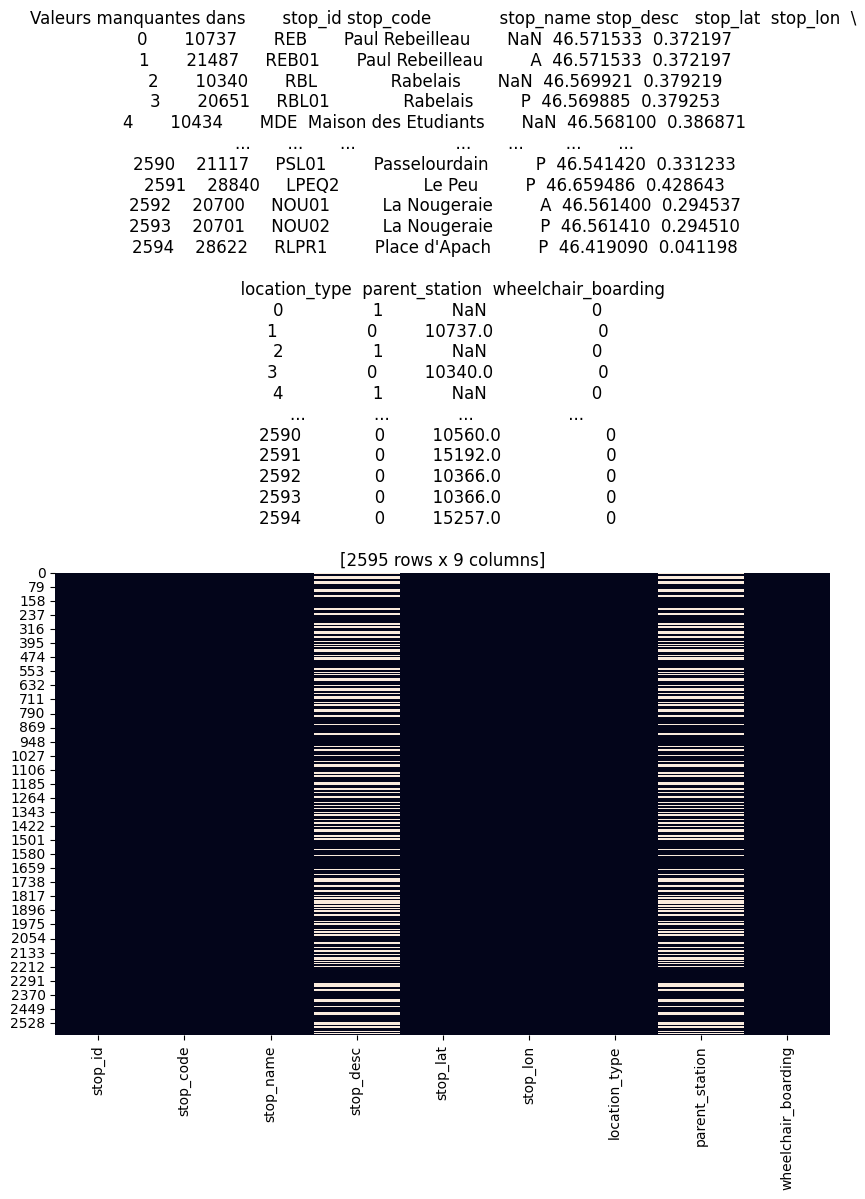

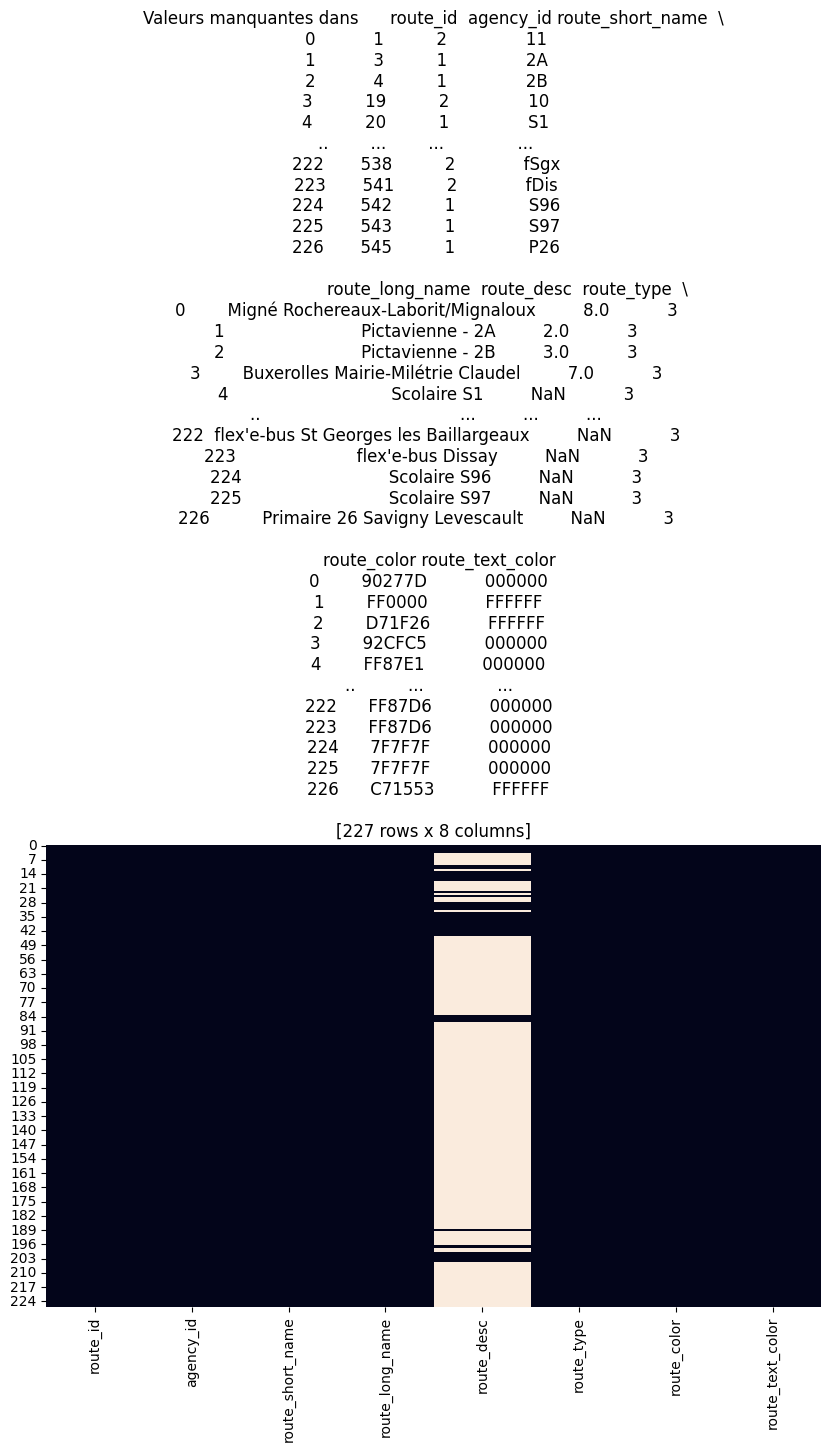

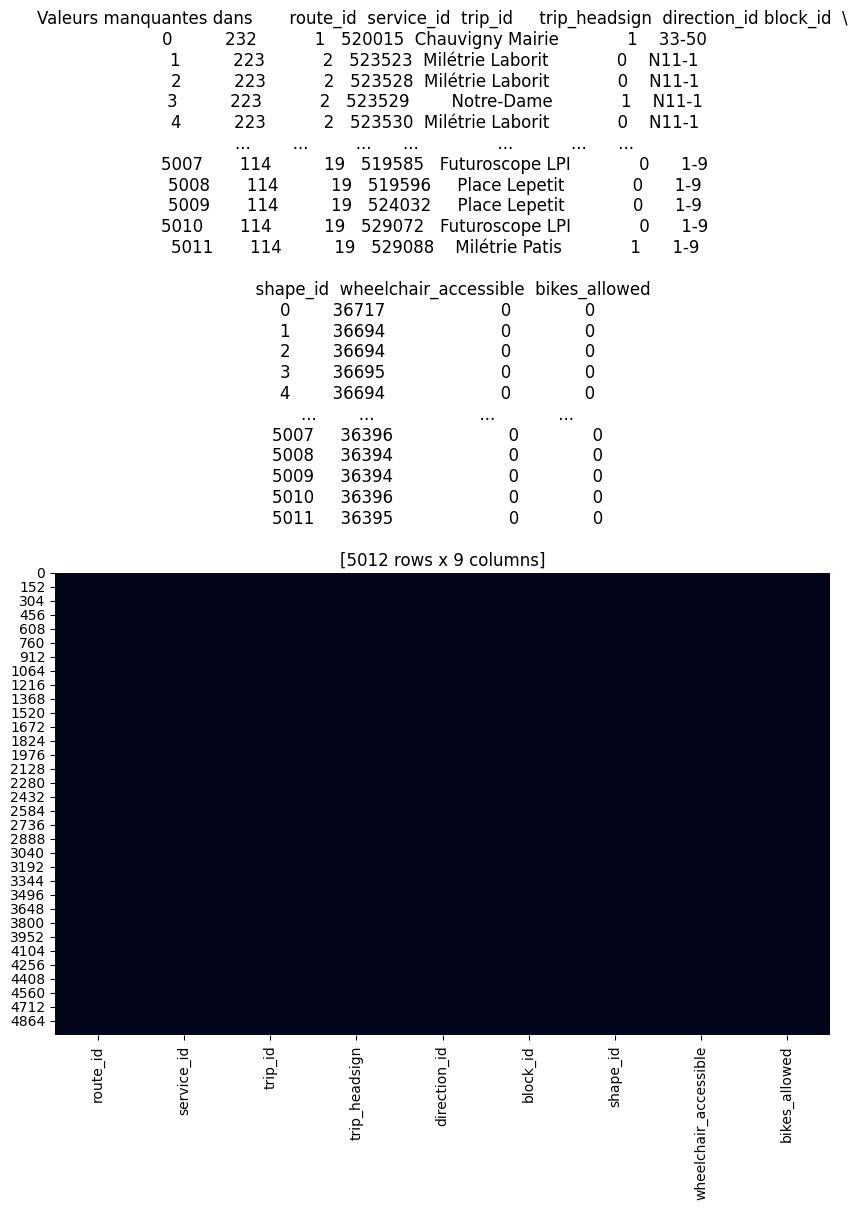

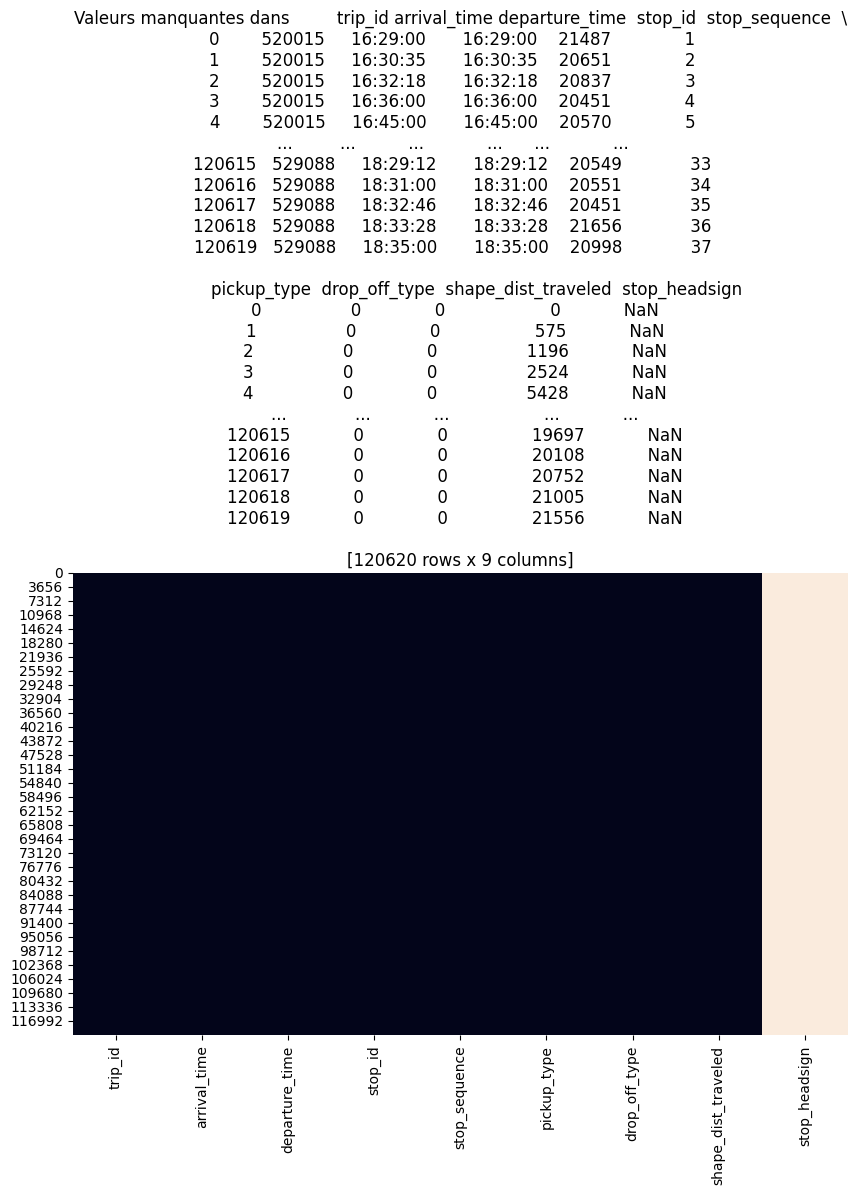

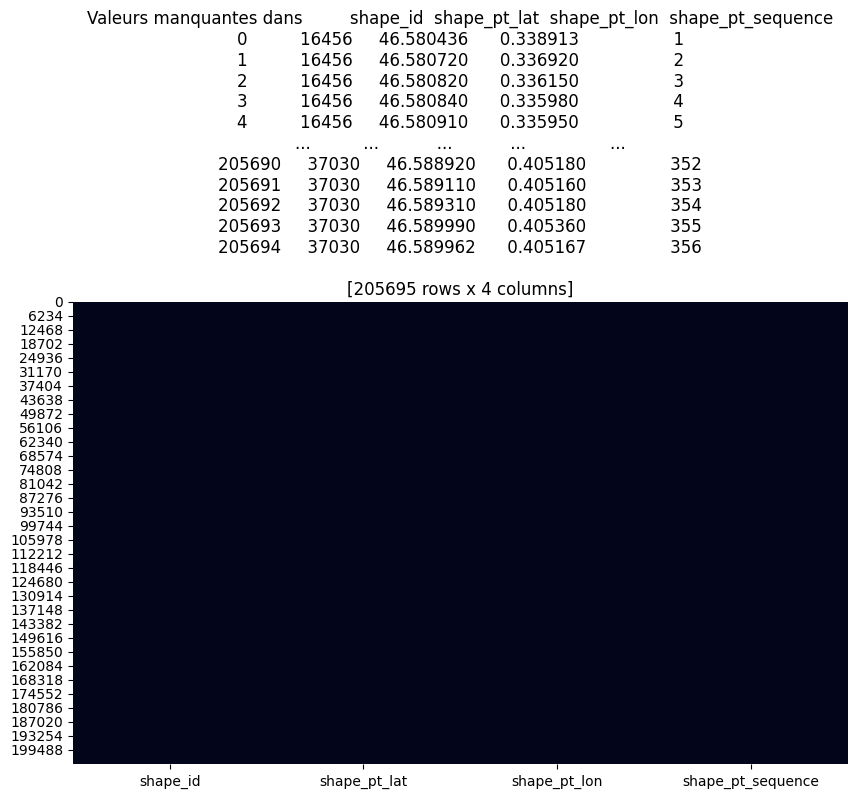

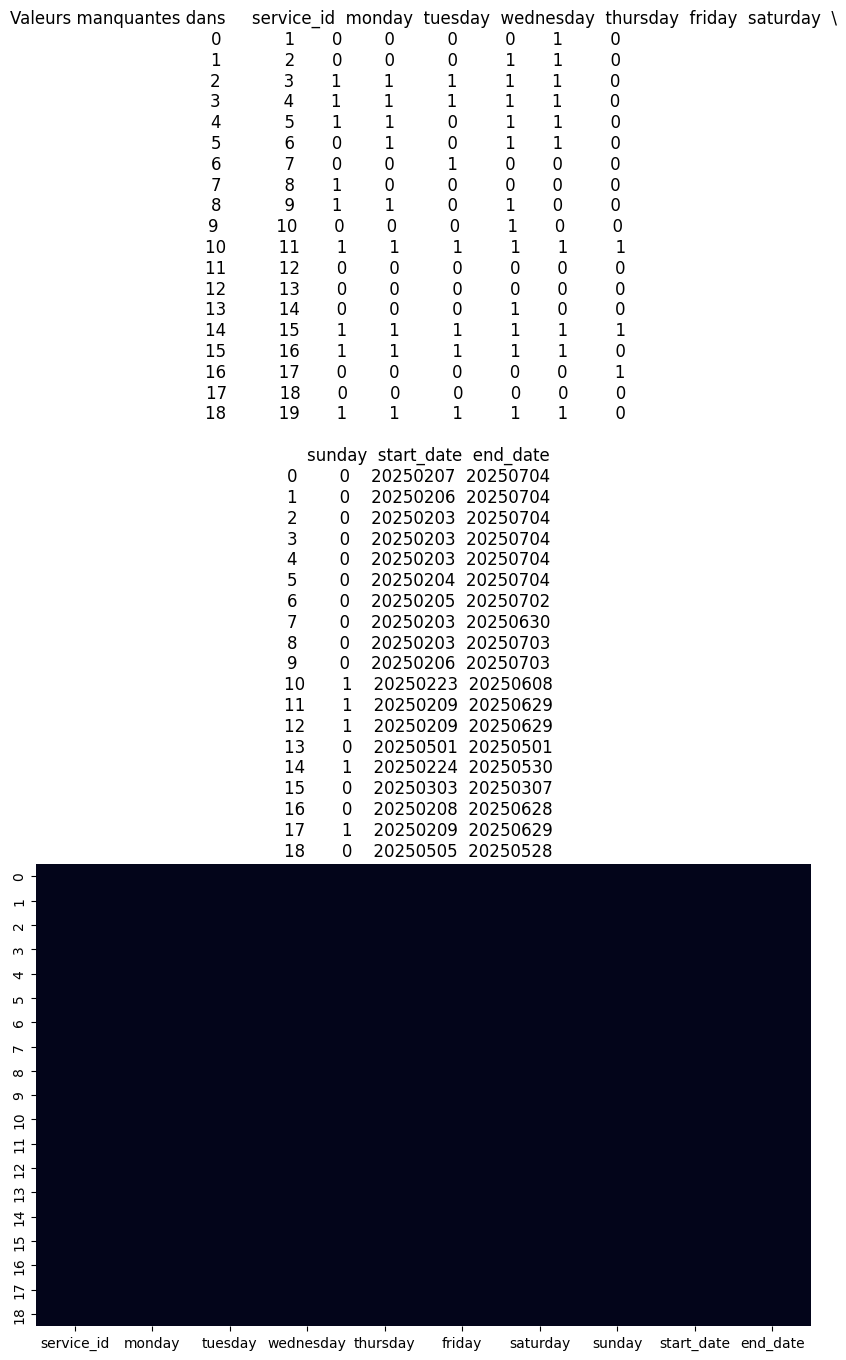

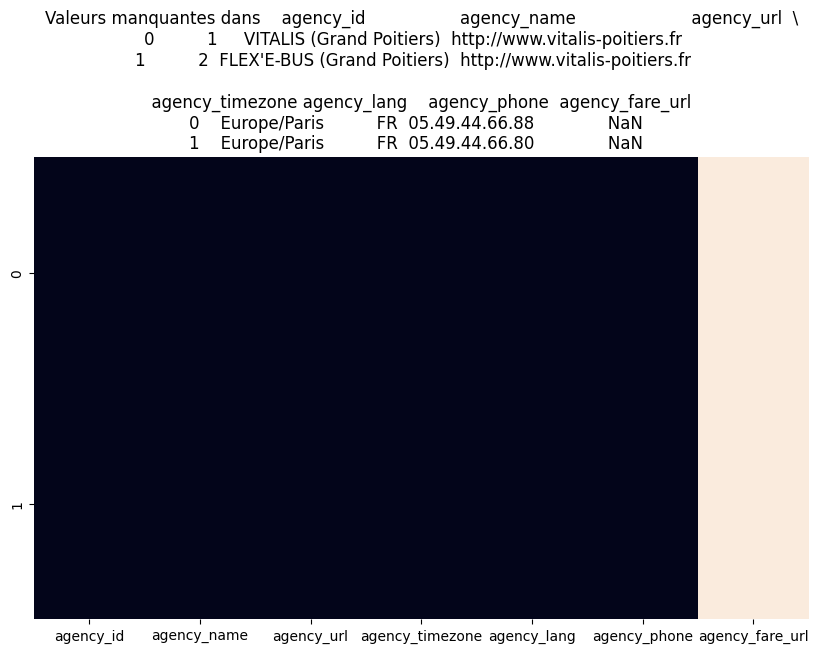

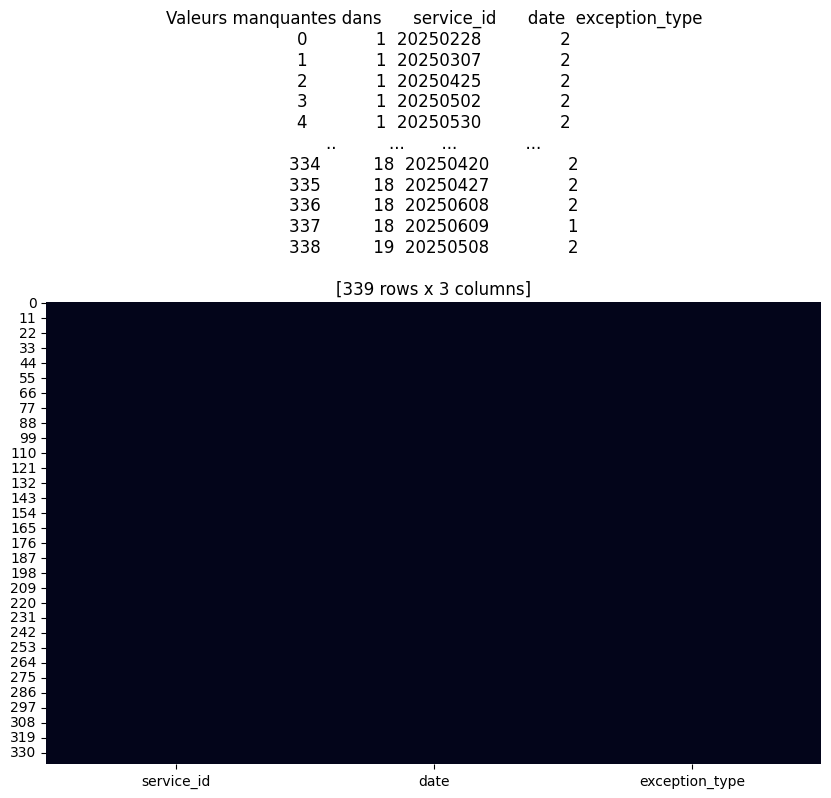

In [6]:
# 3.1 Valeurs manquantes

# Afficher les valeurs manquantes pour chaque colonne
for df in [df_stops, df_routes, df_trips, df_stop_times, df_shapes, df_calendar, df_agency, df_calendar_dates]:
    print(f"Valeurs manquantes dans {df.columns[0]} :")
    print(df.isnull().sum())
    print("\n")

# Visualiser les valeurs manquantes

for df in [df_stops, df_routes, df_trips, df_stop_times, df_shapes, df_calendar, df_agency, df_calendar_dates]:
    plt.figure(figsize=(10, 6))
    plt.title(f"Valeurs manquantes dans {df}")
    sns.heatmap(df.isnull(), cbar=False)
    plt.show()

In [7]:
# 3.2 Doublons

for df in [df_stops, df_routes, df_trips, df_stop_times, df_shapes, df_calendar, df_agency, df_calendar_dates]:
    print(f"Doublons dans {df.columns[0]} :")
    print(df.duplicated().sum())
    print("\n")

Doublons dans stop_id :
0


Doublons dans route_id :
0


Doublons dans route_id :
0


Doublons dans trip_id :
0


Doublons dans shape_id :
0


Doublons dans service_id :
0


Doublons dans agency_id :
0


Doublons dans service_id :
0




In [8]:
# 3.3 Types de colonnes

for df in [df_stops, df_routes, df_trips, df_stop_times, df_shapes, df_calendar, df_agency, df_calendar_dates]:
    print(f"Types de colonnes dans {df.columns[0]} :")
    print(df.dtypes)
    print("\n")

Types de colonnes dans stop_id :
stop_id                  int64
stop_code               object
stop_name               object
stop_desc               object
stop_lat               float64
stop_lon               float64
location_type            int64
parent_station         float64
wheelchair_boarding      int64
dtype: object


Types de colonnes dans route_id :
route_id              int64
agency_id             int64
route_short_name     object
route_long_name      object
route_desc          float64
route_type            int64
route_color          object
route_text_color     object
dtype: object


Types de colonnes dans route_id :
route_id                  int64
service_id                int64
trip_id                   int64
trip_headsign            object
direction_id              int64
block_id                 object
shape_id                  int64
wheelchair_accessible     int64
bikes_allowed             int64
dtype: object


Types de colonnes dans trip_id :
trip_id                  in

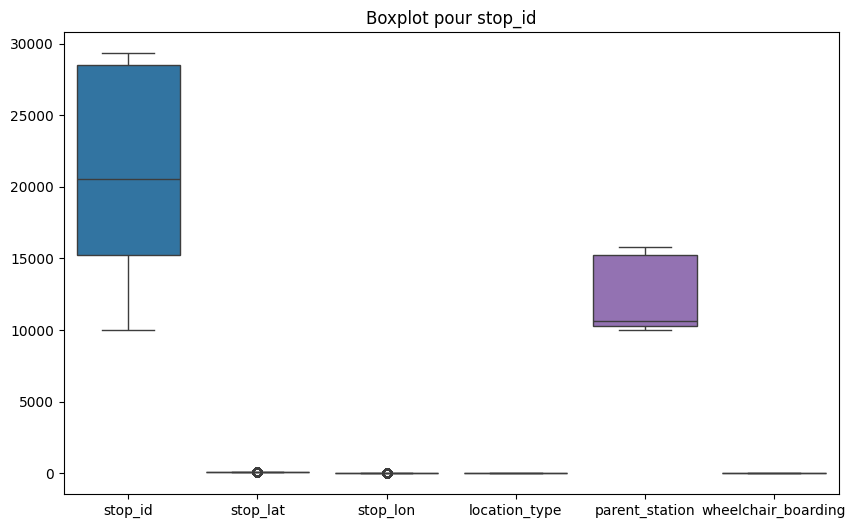

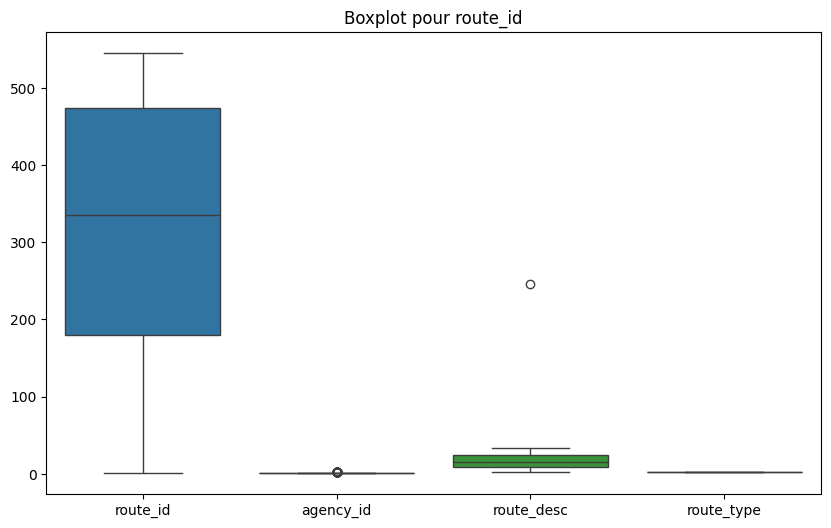

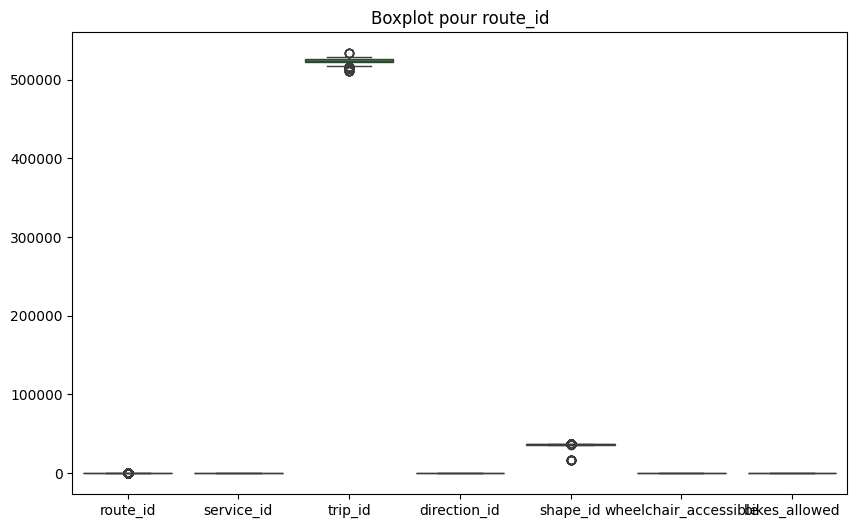

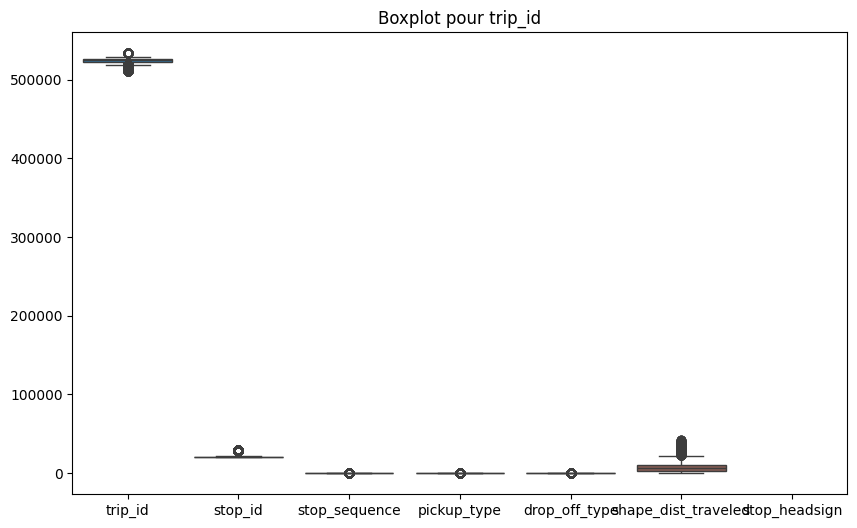

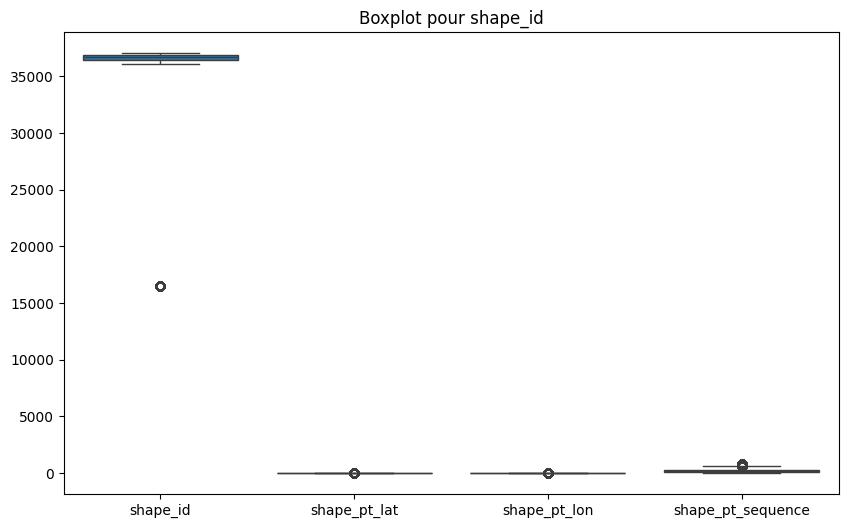

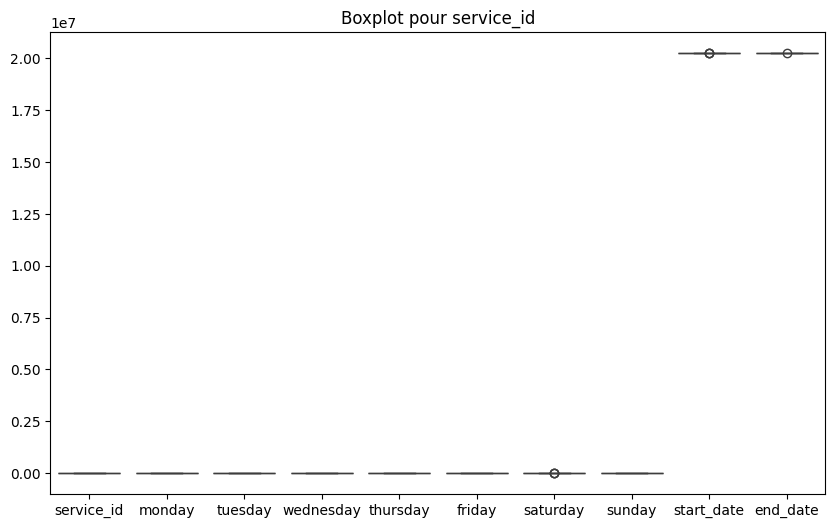

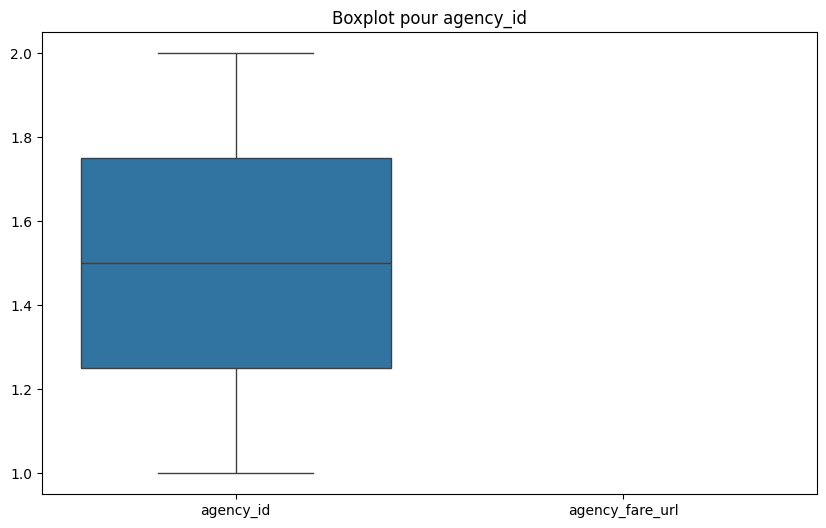

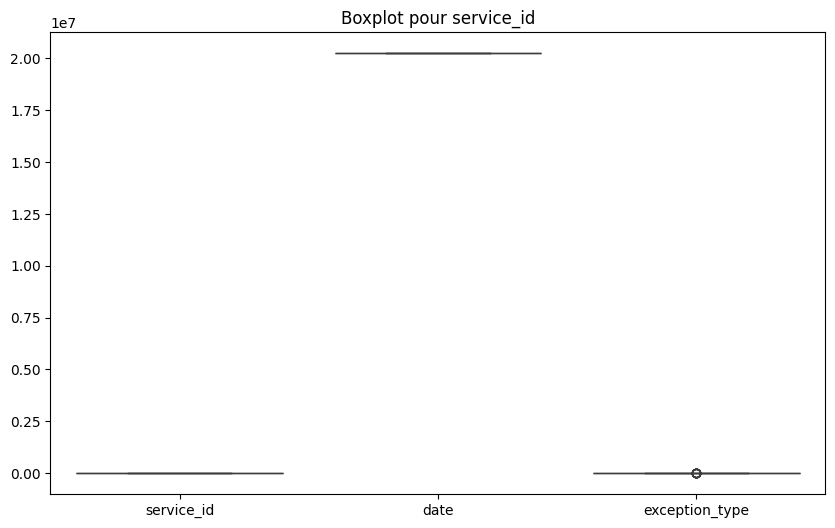

In [9]:
# 3.4 Outliers (boxplots)
for df in [df_stops, df_routes, df_trips, df_stop_times, df_shapes, df_calendar, df_agency, df_calendar_dates]:
    plt.figure(figsize=(10, 6))
    plt.title(f"Boxplot pour {df.columns[0]}")
    sns.boxplot(data=df)
    plt.show()

In [10]:
# Stocker tous les DataFrames dans un dictionnaire
df_dict = {
    "stops": df_stops,
    "routes": df_routes,
    "trips": df_trips,
    "stop_times": df_stop_times,
    "shapes": df_shapes,
    "calendar": df_calendar,
    "agency": df_agency,
    "calendar_dates": df_calendar_dates
}

# Nettoyage en place
for key in df_dict:
    df_dict[key] = df_dict[key].drop_duplicates().fillna('null')



In [11]:
from ydata_profiling import ProfileReport

for key, df in df_dict.items():
    try:
        profile = ProfileReport(df, title=f"Rapport EDA - {key}", explorative=True)
        profile.to_file(f"rapport_eda_{key}.html")
        print(f"✅ Rapport généré pour {key}")
    except Exception as e:
        print(f"❌ Erreur pour {key} : {e}")


Summarize dataset:  43%|████▎     | 6/14 [00:01<00:01,  4.92it/s, Describe variable: wheelchair_boarding]


❌ Erreur pour stops : 'float' object has no attribute 'ndim'


Summarize dataset:  38%|███▊      | 5/13 [00:00<00:00, 12.05it/s, Describe variable: route_text_color]


❌ Erreur pour routes : 'float' object has no attribute 'ndim'


Summarize dataset:  43%|████▎     | 6/14 [00:00<00:00, 10.87it/s, Describe variable: bikes_allowed]


❌ Erreur pour trips : 'float' object has no attribute 'ndim'


Summarize dataset:  43%|████▎     | 6/14 [00:04<00:05,  1.49it/s, Describe variable: stop_headsign]


❌ Erreur pour stop_times : 'float' object has no attribute 'ndim'


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 40.56it/s]


✅ Rapport généré pour shapes


Summarize dataset:  20%|██        | 3/15 [00:00<00:01,  9.03it/s, Describe variable: end_date]


❌ Erreur pour calendar : 'float' object has no attribute 'ndim'


Summarize dataset:  50%|█████     | 6/12 [00:00<00:00, 11.28it/s, Describe variable: agency_fare_url]


❌ Erreur pour agency : 'float' object has no attribute 'ndim'


Summarize dataset:  25%|██▌       | 2/8 [00:00<00:00, 18.64it/s, Describe variable: exception_type]

❌ Erreur pour calendar_dates : 'float' object has no attribute 'ndim'


In [12]:
# 4. Rapport automatisé (pandas-profiling)

for df in [df_stops, df_routes, df_trips, df_stop_times, df_shapes, df_calendar, df_agency, df_calendar_dates]:
    profile = ProfileReport(df, title="Profiling Report")
    profile.to_file(f"{df.columns[0]}_profiling_report.html")

Summarize dataset:  43%|████▎     | 6/14 [00:00<00:01,  6.55it/s, Describe variable: wheelchair_boarding]


AttributeError: 'float' object has no attribute 'ndim'

In [ ]:
# 5. Visualisation des corrélations
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

NameError: name 'plt' is not defined

In [ ]:
# 6. Sélection de variables pertinentes
correlation_target = df.corr()['nom_de_la_variable_cible'].sort_values(ascending=False)
correlation_target